# TensorFlow

## What is TensorFlow?

### A library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent tensors communicated between them.


## What is a Tensor?

### Multi dimensional data array.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

#### A default TensorFlow computation graph is created automatically.

In [2]:
tf.reset_default_graph()
graph = tf.get_default_graph()
graph.get_operations()

[]

#### Let's add some nodes to the graph

In [3]:
a = tf.constant(2)

b = tf.constant(3)

x = tf.add(a, b)

a,b,x

(<tf.Tensor 'Const:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_1:0' shape=() dtype=int32>,
 <tf.Tensor 'Add:0' shape=() dtype=int32>)

In [4]:
ops = tf.get_default_graph().get_operations()
ops

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Add' type=Add>]

In [5]:
ops[0].node_def

name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
      }
      int_val: 2
    }
  }
}

In [6]:
ops[2].node_def

name: "Add"
op: "Add"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}

### `tf.add(tf.constant(2), tf.constant(3))` is equivalent to:

In [10]:
tf.add(2,3)

<tf.Tensor 'Add_2:0' shape=() dtype=int32>

In [11]:
a + b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

### Let's give our ops more meaningful names

In [12]:
tf.reset_default_graph()
w_ = tf.constant(3, name="width")
l_ = tf.constant(4, name="length")

area_ = tf.multiply(w_, l_, name="area")

In [13]:
tf.get_default_graph().get_operations()

[<tf.Operation 'width' type=Const>,
 <tf.Operation 'length' type=Const>,
 <tf.Operation 'area' type=Mul>]

### This is all fine, but how do we execue the graph computation?

In [14]:
sess=tf.Session()
area = sess.run(area_)
sess.close()
area

12

In [15]:
with tf.Session() as sess:
    area2 = sess.run(area_)

area2

12

In [17]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    sess.run(area_)

writer.close()

### Let's run TensorBoard to visualize the graph
````
tensorboard --logdir=path/to/logs

```

In [25]:
!rm -rf graphs

In [29]:
tf.reset_default_graph()
x_ = tf.constant(3., name="x")
a_ = tf.constant(1., name="a")
b_ = tf.constant(4., name="b")
c_ = tf.constant(-9., name="c")
discriminant_ = tf.pow(b_, 2) - 4 * a_ * c_
root1_ = (- b_ + tf.sqrt(discriminant_)) / 2 * a_
root2_ = (- b_ - tf.sqrt(discriminant_)) / 2 * a_
y_ = a_ * tf.pow(x_, 2) + b_ * x_ + c_

In [30]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    sess.run([y_])

writer.close()

In [ ]:
v_ = tf.random_normal([5])
b_ = tf.constant(1.)
s_ = tf.add(v_, b_)
with tf.Session() as sess:
    v, b, s = sess.run( [v_, b_, s_])

print(v.tolist())
print(s.tolist())

### Types of Tensor objects:

- ** Constants:  ** Fixed values
- ** Placeholders:  ** Input values
- ** Variables: ** Trainable values

In [31]:
tf.reset_default_graph()

def rectangle_area(widths, lengths):
    w_ph = tf.placeholder(tf.float32, name="width_placeholder")
    l_ph = tf.placeholder(tf.float32, name="length_placeholder")
    area_ = tf.multiply(w_ph, l_ph, name="area")
    feed_dict = {w_ph: widths, l_ph: lengths}
    with tf.Session() as sess:
        areas = sess.run(area_, feed_dict=feed_dict)
    return areas

In [32]:
rectangle_area(4, 5)

20.0

In [33]:
rectangle_area([2, 4, 6], [15, 10, 5]).tolist()

[30.0, 40.0, 30.0]

### Optimizers

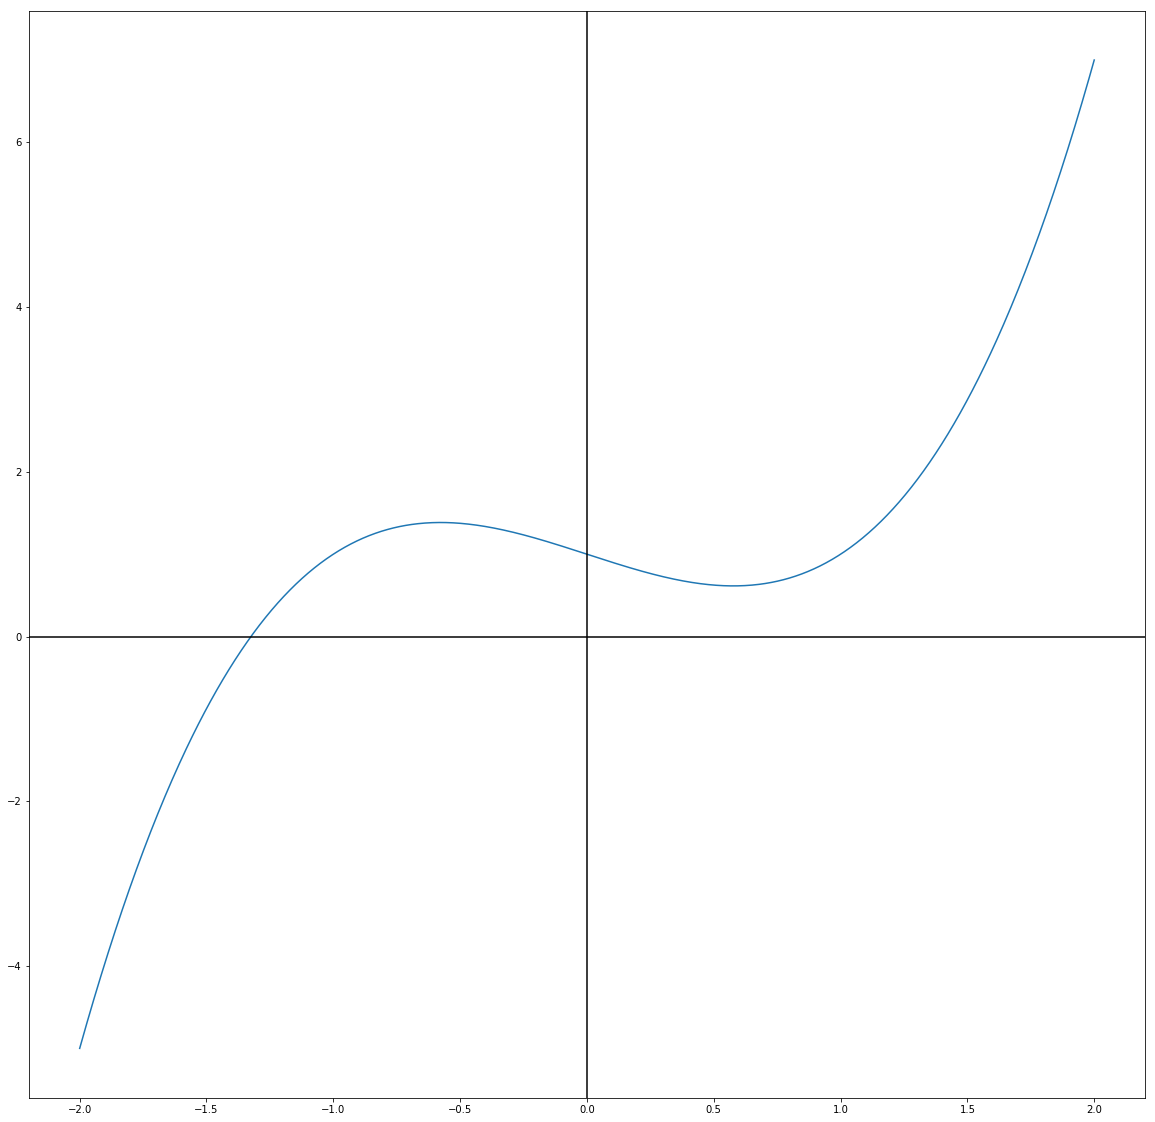

In [34]:
x = np.linspace(-2, 2, 1000)

y = x**3 - x + 1

fig, ax = plt.subplots(figsize=(20, 20)) 
ax.plot(x, y)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

In [35]:
x_ = tf.Variable(-1.5,dtype=tf.float32,name='x')
y_ = tf.pow(x_, 3) - x_ + 1
error_ = tf.abs(y_, name="error")

y_, x_, error_

(<tf.Tensor 'add:0' shape=() dtype=float32>,
 <tf.Variable 'x:0' shape=() dtype=float32_ref>,
 <tf.Tensor 'error:0' shape=() dtype=float32>)

In [36]:
optimizer_ = tf.train.GradientDescentOptimizer(learning_rate=.0001).minimize(error_)

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    errors = []
    for i in range(500):
        _, error = sess.run([optimizer_, error_])
        errors += [error]
        
    solution = sess.run(x_)
print(solution, error)

-1.32452 0.000964165


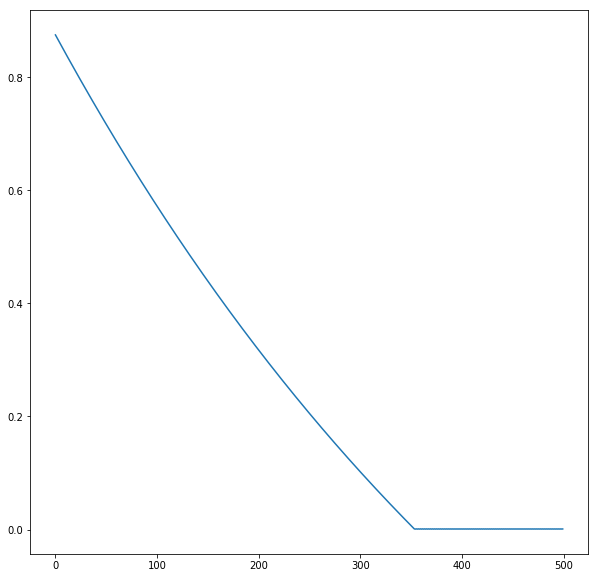

In [38]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.plot(errors)
plt.show()

In [41]:
!rm -rf graphs

In [42]:
tf.reset_default_graph()

x_ = tf.Variable(-1.5,dtype=tf.float32,name='x')
with tf.variable_scope("function"):
    y_ = tf.pow(x_, 3) - x_ + 1
error_ = tf.abs(y_, name="error")
optimizer_ = tf.train.GradientDescentOptimizer(learning_rate=.0001).minimize(error_)

summary_writer = tf.summary.FileWriter('./graphs', sess.graph)
tf.summary.scalar("error_summary", error_)

summary_ = tf.summary.merge_all()

with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        sess.run(optimizer_)
        summary = sess.run(summary_)
        summary_writer.add_summary(summary, i)

summary_writer.close()